In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
trainDf = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
testDf = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

print(trainDf.shape)
print(testDf.shape)

(8693, 14)
(4277, 13)


In [3]:
trainDf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now I will check for missing values in the data

In [4]:
trainDf.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

for the testing data too

In [5]:
testDf.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

All columns have null values, now I will check if there are any duplicates in the data

In [6]:
print("For Training Data: ",trainDf.duplicated().sum())
print("For Testing Data: ",testDf.duplicated().sum())

For Training Data:  0
For Testing Data:  0


We do not have any duplicate values in the data.


In [7]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Now I will describe the data to understand more about the numerical features

In [9]:
trainDf.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
trainDf['Transported'].value_counts()/trainDf['Transported'].count() 

True     0.503624
False    0.496376
Name: Transported, dtype: float64

We can see that we have roughly equal number of classes. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Age vs Transported Distribution')

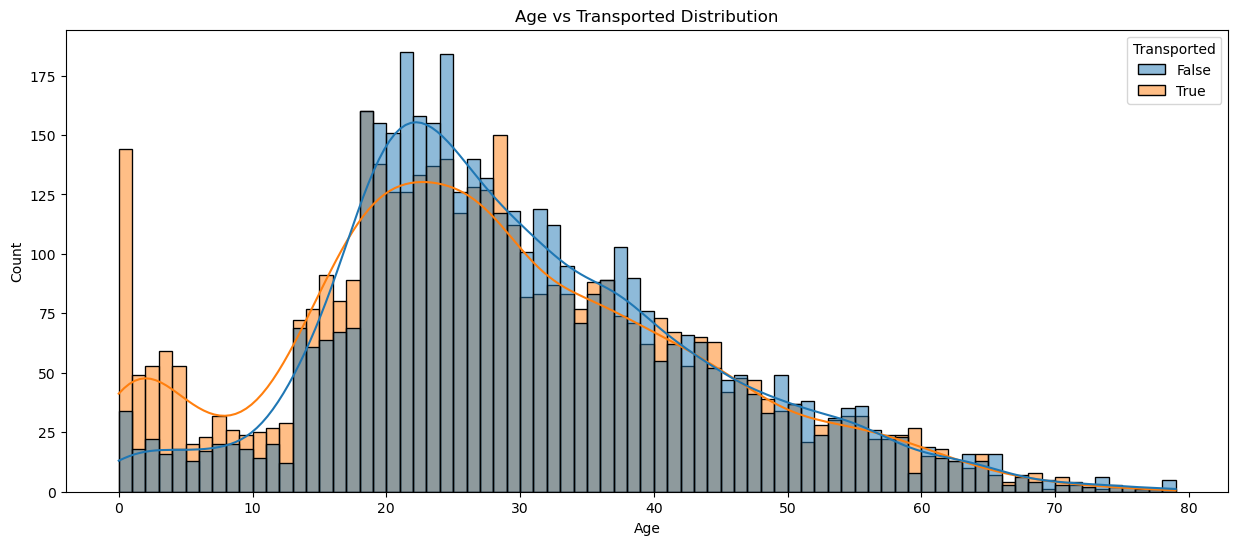

In [12]:
plt.figure(figsize = (15,6))
sns.histplot(data = trainDf, x='Age', hue='Transported',kde =True,binwidth = 1)
plt.title('Age vs Transported Distribution')


Here we can see that for the ages:

* 0-18 : More people we transported than not
* 18-42: The number of people not transported is more than those who werent
* 42+ : The nimber of people transported is roughgly the same as those who werent

Perhaps creating a new feature which tell us than if the person is a child, in the prime of his youth or old.

Now checking the other numerical features features

Text(0.5, 1.0, 'Room Service vs Transported Distribution')

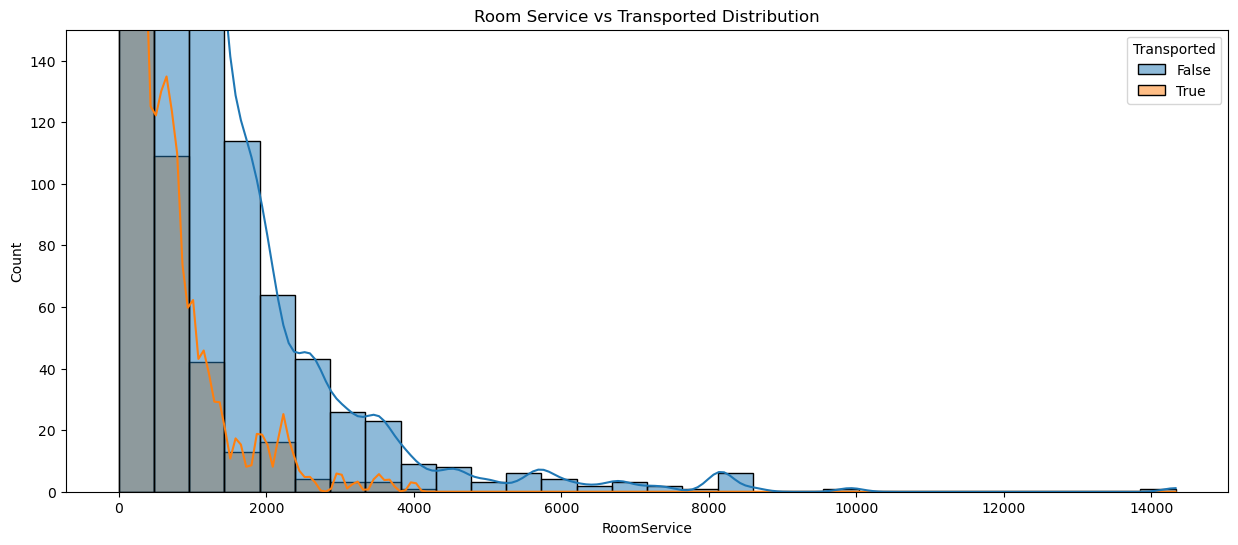

In [13]:
plt.figure(figsize = (15,6))
sns.histplot(data = trainDf, x='RoomService', hue='Transported',bins=30,kde =True)
plt.ylim([0,150])
plt.title('Room Service vs Transported Distribution')

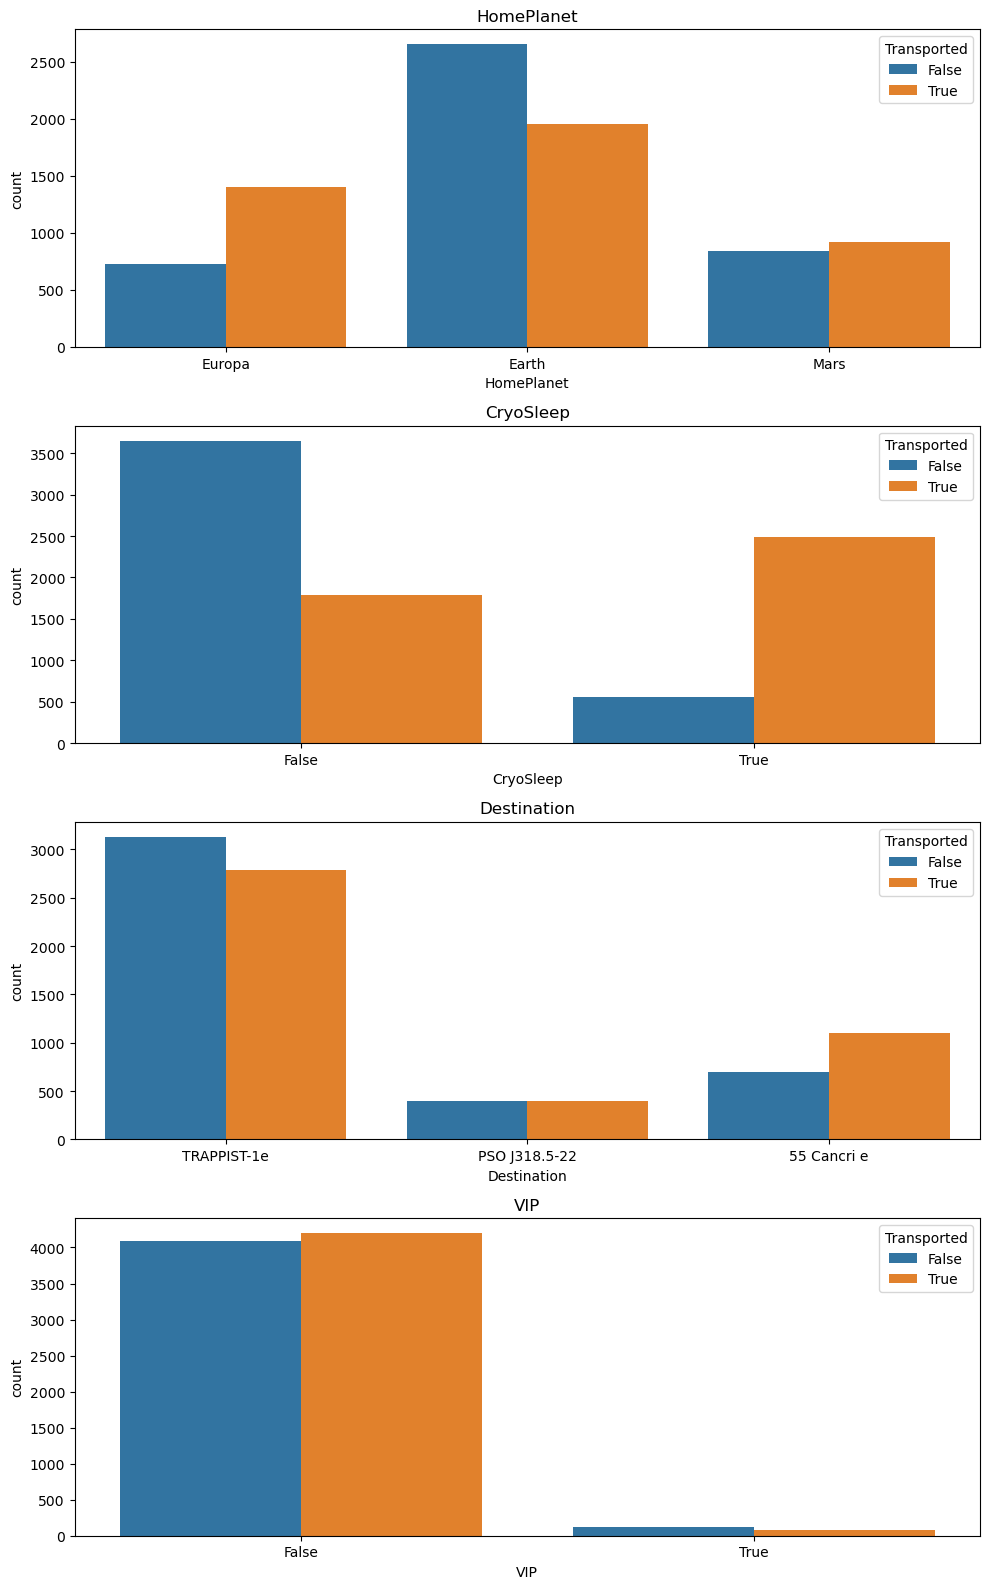

In [16]:
catFeats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(catFeats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=trainDf, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

From the above graphs we can see that:
* People who were in Cryosleep were transported more than those who werent.
* Ratio of people from Europa who transported is approx twice as much as those who werent

We might drop VIP column as it deosnt providde any useful information

In [17]:
remainingCols = ['PassengerId','Cabin','Name']
trainDf[remainingCols].head(5).append(trainDf[remainingCols].tail(5))

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
8688,9276_01,A/98/P,Gravior Noxnuther
8689,9278_01,G/1499/S,Kurta Mondalley
8690,9279_01,G/1500/S,Fayey Connon
8691,9280_01,E/608/S,Celeon Hontichre
8692,9280_02,E/608/S,Propsh Hontichre


From the PassengerID column we can get the number of passengers in the group, we can get deck number and side from cabin.

In [18]:
trainDf['AgeGroups'] = np.nan
trainDf.loc[trainDf['Age']<=18,'AgeGroups'] = 'Child'
trainDf.loc[(trainDf['Age']>18) & (trainDf['Age']<=42),'AgeGroups'] = 'Adult'
trainDf.loc[trainDf['Age']>42,'AgeGroups'] = 'Old'


testDf['AgeGroups'] = np.nan
testDf.loc[testDf['Age']<=18,'AgeGroups'] = 'Child'
testDf.loc[(testDf['Age']>18) & (testDf['Age']<=42),'AgeGroups'] = 'Adult'
testDf.loc[testDf['Age']>42,'AgeGroups'] = 'Old'

Now we plot the age distribution

Text(0.5, 1.0, 'Age Group Distribution')

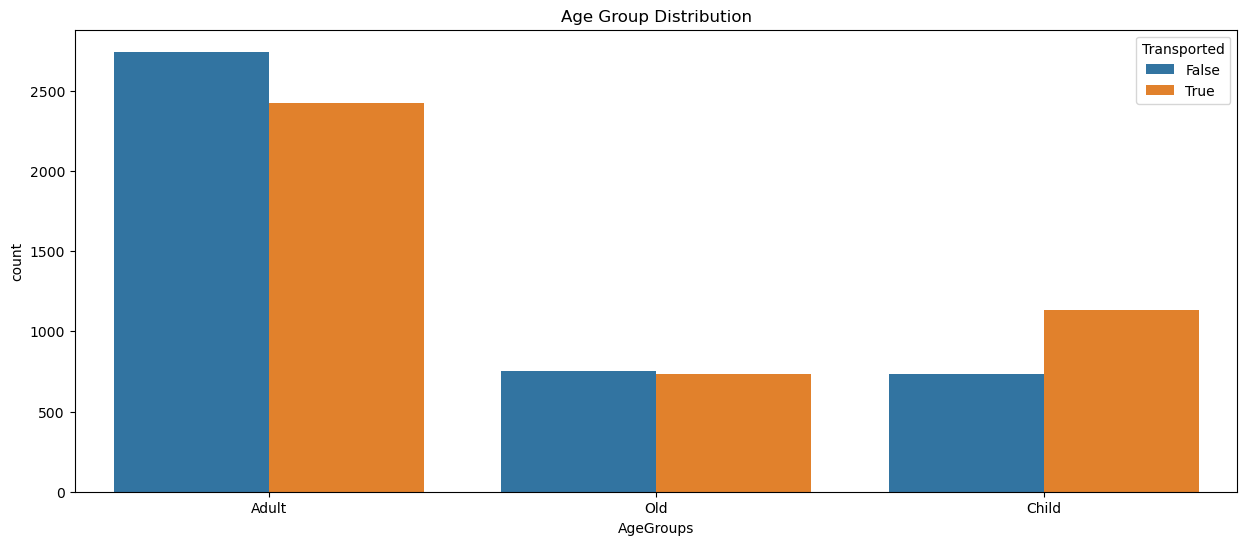

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=trainDf,x='AgeGroups',hue = 'Transported')
plt.title('Age Group Distribution')

Now I will get the group size from the groups of passenger Id, I will use value_counts() on each group

In [20]:
trainDf['GroupSize'] = np.nan
trainDf['Group'] = trainDf['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
trainDf['GroupSize'] = trainDf['Group'].map(lambda x: trainDf['Group'].value_counts()[x]).astype(int)

testDf['GroupSize'] = np.nan
testDf['Group'] = testDf['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
testDf['GroupSize'] = testDf['Group'].map(lambda x: testDf['Group'].value_counts()[x]).astype(int)

Text(0.5, 1.0, 'Group Size Distribution')

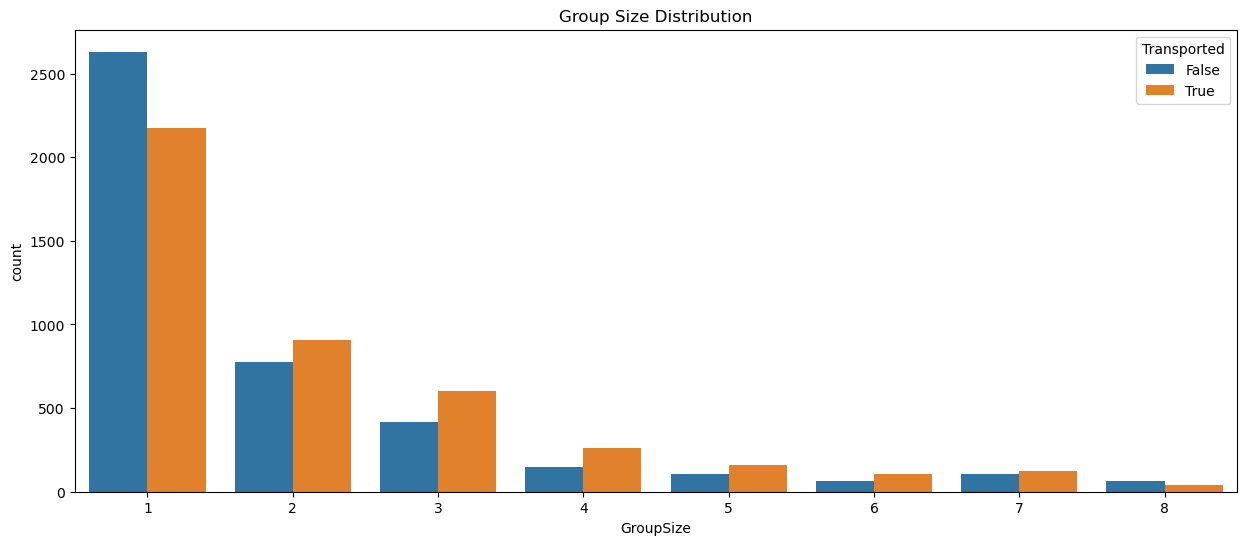

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=trainDf,x='GroupSize',hue = 'Transported')
plt.title('Group Size Distribution')

Here we can see the various group sizes, most of the people are solo travellers depending on the group number.

In [22]:
trainDf['Cabin'].fillna('Z/9999/Z',inplace=True) #this is because we cannot split nan data in the training DF
testDf['Cabin'].fillna('Z/9999/Z',inplace=True)
trainDf['CabinDeck'] = trainDf['Cabin'].apply(lambda x: x.split('/')[0])#.astype(int)
testDf['CabinDeck'] = testDf['Cabin'].apply(lambda x: x.split('/')[0])#.astype(int)
#print(g)

trainDf.loc[trainDf['CabinDeck']=='Z','CabinDeck'] = np.nan
testDf.loc[trainDf['CabinDeck']=='Z','CabinDeck'] = np.nan



In [23]:
trainDf.drop('Cabin', axis =1, inplace = True)
testDf.drop('Cabin', axis =1, inplace = True)
testDf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'AgeGroups', 'GroupSize', 'Group', 'CabinDeck'],
      dtype='object')

Text(0.5, 1.0, 'Cabin Deck')

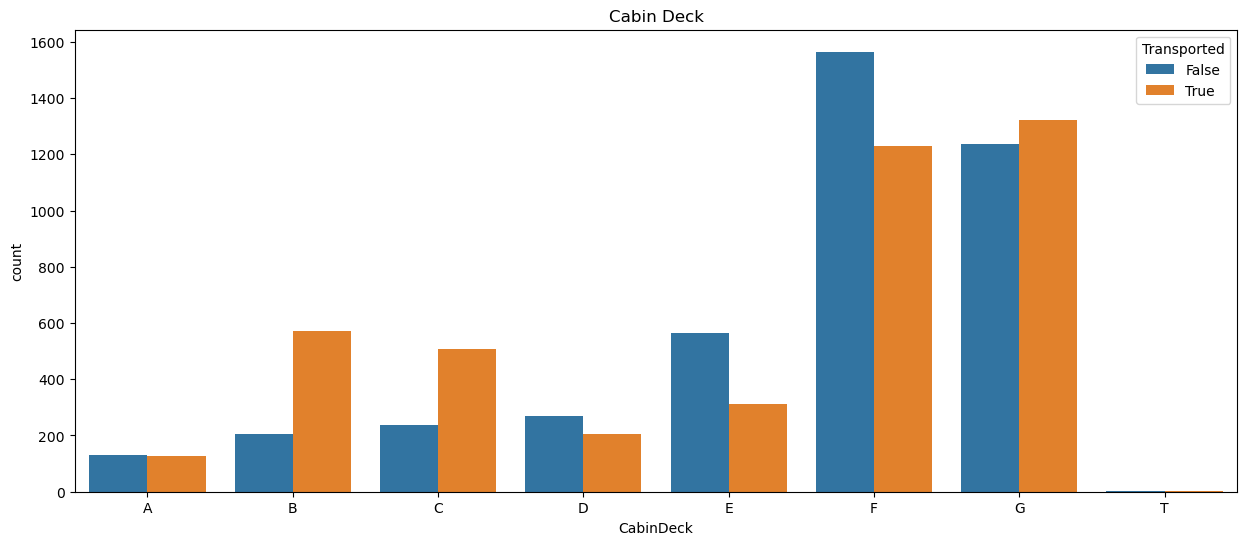

In [24]:
fig=plt.figure(figsize=(15,6))
#plt.subplot(3,1,1)
sns.countplot(data=trainDf, x='CabinDeck', hue='Transported',order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin Deck')


In [26]:
print(len(trainDf.columns)-len(testDf.columns))
trainDf.columns

1


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'AgeGroups', 'GroupSize', 'Group', 'CabinDeck'],
      dtype='object')

In [27]:
trainDf.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
AgeGroups       179
GroupSize         0
Group             0
CabinDeck       199
dtype: int64

In [28]:
testDf.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
AgeGroups        91
GroupSize         0
Group             0
CabinDeck         0
dtype: int64

Now we deal with missing values

In [219]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  AgeGroups     8514 non-null   object 
 14  GroupSize     8693 non-null   int64  
 15  Group         8693 non-null   int64  
 16  CabinDeck     8494 non-null   object 
dtypes: bool(1), float64(6), int64(2), object(8)
memory usage: 1.1+ MB


In [29]:
trainDf.HomePlanet.value_counts()/trainDf.PassengerId.count()





Earth     0.529391
Europa    0.245140
Mars      0.202347
Name: HomePlanet, dtype: float64

Since the number of missing values are approximately 2%, I am replacing the missing values by mode,i.e Earth for HomePlanet

In [30]:
trainDf.HomePlanet.fillna('Earth',inplace=True)
#trainDf.HomePlanet.isna().sum()

testDf.HomePlanet.fillna('Earth',inplace=True)
#trainDf.HomePlanet.isna().sum()

In [31]:
trainDf.CryoSleep.value_counts()/trainDf.PassengerId.count()


False    0.625676
True     0.349362
Name: CryoSleep, dtype: float64

In [32]:
trainDf.CryoSleep.fillna('False',inplace=True)

#trainDf.CryoSleep.isna().sum()
testDf.CryoSleep.fillna('False',inplace=True)

I am dropping the VIP column as it does not provide us with any usefull information

In [33]:
trainDf.drop('VIP',inplace=True,axis = 1)
testDf.drop('VIP',inplace=True,axis = 1)

In [34]:
trainDf.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
AgeGroups       179
GroupSize         0
Group             0
CabinDeck       199
dtype: int64

In [35]:
trainDf.Destination.value_counts()/trainDf.PassengerId.count()

TRAPPIST-1e      0.680433
55 Cancri e      0.207063
PSO J318.5-22    0.091568
Name: Destination, dtype: float64

In [36]:
trainDf.Destination.fillna('TRAPPIST-1e',inplace=True)

#trainDf.CryoSleep.isna().sum()
testDf.Destination.fillna('TRAPPIST-1e',inplace=True)
trainDf.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
AgeGroups       179
GroupSize         0
Group             0
CabinDeck       199
dtype: int64

In [37]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  AgeGroups     8514 non-null   object 
 13  GroupSize     8693 non-null   int64  
 14  Group         8693 non-null   int64  
 15  CabinDeck     8494 non-null   object 
dtypes: bool(1), float64(6), int64(2), object(7)
memory usage: 1.0+ MB


In [38]:
trainDf.Name.fillna('NA',inplace = True)
testDf.Name.fillna('NA',inplace = True)
trainDf.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
AgeGroups       179
GroupSize         0
Group             0
CabinDeck       199
dtype: int64

In [39]:
trainDf.CabinDeck.value_counts()#/trainDf.PassengerId.count()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [40]:
trainDf.groupby(['HomePlanet','CabinDeck']).count()

PassengerId  CryoSleep  Destination   Age  RoomService  \
HomePlanet CabinDeck                                                           
Earth      A                    4          4            4     3            4   
           B                   13         13           13    13           12   
           C                   13         13           13    12           13   
           D                   10         10           10    10           10   
           E                  418        418          418   412          410   
           F                 1684       1684         1684  1663         1645   
           G                 2559       2559         2559  2501         2499   
           T                    1          1            1     1            1   
Europa     A                  252        252          252   244          247   
           B                  766        766          766   753          754   
           C                  734        734          734   717          723   
           D                  186        186          186   181          182   
           E                  128        128          128   126          126   
           T                    4          4            4     4            4   
Mars       D                  282        282          282   276          275   
           E                  330        330          330   318          324   
           F                 1110       1110         1110  1085         1088   

                      FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
HomePlanet CabinDeck                                                
Earth      A                  4             4     4       4     4   
           B                 13            13    13      13    13   
           C                 13            13    13      12    13   
           D                 10             9    10      10    10   
           E                413           410   407     410   418   
           F               1644          1648  1646    1643  1684   
           G               2507          2486  2507    2498  2559   
           T                  1             1     1       1     1   
Europa     A                250           245   252     247   252   
           B                753           746   749     754   766   
           C                711           716   717     722   734   
           D                182           183   179     180   186   
           E                125           125   125     128   128   
           T                  4             3     4       4     4   
Mars       D                277           276   275     277   282   
           E                324           324   325     325   330   
           F               1085          1086  1086    1082  1110   

                      Transported  AgeGroups  GroupSize  Group  
HomePlanet CabinDeck                                            
Earth      A                    4          3          4      4  
           B                   13         13         13     13  
           C                   13         12         13     13  
           D                   10         10         10     10  
           E                  418        412        418    418  
           F                 1684       1663       1684   1684  
           G                 2559       2501       2559   2559  
           T                    1          1          1      1  
Europa     A                  252        244        252    252  
           B                  766        753        766    766  
           C                  734        717        734    734  
           D                  186        181        186    186  
           E                  128        126        128    128  
           T                    4          4          4      4  
Mars       D                  282        276        282    282  
           E                  330        318        330    330  
           F       

For the cabin deck, making an estimate for the mode may not be the right choice as we have a minority class in group T, I am filling all the na values with T to compensate for the same, another option could have been using 'unknown' 

In [41]:
trainDf.CabinDeck.fillna('T',inplace = True)
testDf.CabinDeck.fillna('T',inplace = True)
trainDf.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
AgeGroups       179
GroupSize         0
Group             0
CabinDeck         0
dtype: int64

In [43]:
numericalCols= ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in numericalCols:
    trainDf[col].fillna(trainDf[col].mean(),inplace= True)
    
    testDf[col].fillna(trainDf[col].mean(),inplace= True)
testDf.isna().sum()    

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
AgeGroups       91
GroupSize        0
Group            0
CabinDeck        0
dtype: int64

Dropping Age Groups as it was to understand the age column

In [44]:
trainDf.drop('AgeGroups',inplace=True,axis = 1)
testDf.drop('AgeGroups',inplace=True,axis = 1)


In [45]:
testDf.isna().sum()  

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
GroupSize       0
Group           0
CabinDeck       0
dtype: int64

In [46]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8693 non-null   object 
 11  Transported   8693 non-null   bool   
 12  GroupSize     8693 non-null   int64  
 13  Group         8693 non-null   int64  
 14  CabinDeck     8693 non-null   object 
dtypes: bool(1), float64(6), int64(2), object(6)
memory usage: 959.4+ KB


In [47]:
from sklearn.preprocessing import OneHotEncoder

In [238]:
#type(trainDf['HomePlanet_cat'])
#type(trainDf['HomePlanet'])
#type(trainDf)

In [48]:
trainDf['HomePlanet'] = trainDf['HomePlanet'].astype('category')

trainDf['HomePlanet'] = trainDf['HomePlanet'].cat.codes
testDf['HomePlanet'] = testDf['HomePlanet'].astype('category')

testDf['HomePlanet'] = testDf['HomePlanet'].cat.codes
#print(type(trainDf['HomePlanet_cat']))
#enc = OneHotEncoder()
#encData = pd.DataFrame(enc.fit_transform(trainDf[['HomePlanet_cat']]).toarray())
#print(encData)
#print(trainDf['HomePlanet_cat'].value_counts())
#l=enc.fit_transform((trainDf['HomePlanet_cat']).reshape(-1,1)).toarray()
#trainDf['HomePlanet'] = encData.apply(lambda x: )
#trainDf = trainDf.join(encData)
trainDf.head()
#trainDf.rename()
#trainDf['HomePlanet_cat'].value_counts()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Group,CabinDeck
0,0001_01,1,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B
1,0002_01,0,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,2,F
2,0003_01,1,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,3,A
3,0003_02,1,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,3,A
4,0004_01,0,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,4,F


In [241]:
#trainDf.drop('HomePlanet',inplace=True,axis=1)
#trainDf.drop(0,inplace=True,axis=1)
#trainDf.drop(1,inplace=True,axis=1)
#trainDf.drop(2,inplace=True,axis=1)
trainDf.head()



,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroups,GroupSize,Group,CabinDeck,HomePlanet_cat,0,1,2
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult,1,1,B,1,0.0,1.0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Adult,1,2,F,0,1.0,0.0,0.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Old,2,3,A,1,0.0,1.0,0.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult,2,3,A,1,0.0,1.0,0.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Child,1,4,F,0,1.0,0.0,0.0


In [49]:
trainDf['Destination'] = trainDf['Destination'].astype('category')
trainDf['Destination'] = trainDf['Destination'].cat.codes
testDf['Destination'] = testDf['Destination'].astype('category')
testDf['Destination'] = testDf['Destination'].cat.codes
#print(type(trainDf['HomePlanet_cat']))
#enc = OneHotEncoder()
#encData = pd.DataFrame(enc.fit_transform(trainDf[['HomePlanet_cat']]).toarray())
#trainDf = trainDf.join(encData)

trainDf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Group,CabinDeck
0,0001_01,1,False,2,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B
1,0002_01,0,False,2,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,2,F
2,0003_01,1,False,2,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,3,A
3,0003_02,1,False,2,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,3,A
4,0004_01,0,False,2,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,4,F


In [50]:
trainDf['CabinDeck'] = trainDf['CabinDeck'].astype('category')
trainDf['CabinDeck'] = trainDf['CabinDeck'].cat.codes
testDf['CabinDeck'] = testDf['CabinDeck'].astype('category')
testDf['CabinDeck'] = testDf['CabinDeck'].cat.codes
#trainDf.drop('CabinDeck',inplace=True,axis=1)
trainDf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Group,CabinDeck
0,0001_01,1,False,2,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1
1,0002_01,0,False,2,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,2,5
2,0003_01,1,False,2,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,3,0
3,0003_02,1,False,2,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,3,0
4,0004_01,0,False,2,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,4,5


In [51]:
trainDf['CryoSleep'] = trainDf['CryoSleep'].astype('category')
trainDf['CryoSleep'] = trainDf['CryoSleep'].cat.codes
testDf['CryoSleep'] = testDf['CryoSleep'].astype('category')
testDf['CryoSleep'] = testDf['CryoSleep'].cat.codes
#trainDf.drop('CryoSleep',inplace=True,axis=1)
trainDf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Group,CabinDeck
0,0001_01,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1
1,0002_01,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,2,5
2,0003_01,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,3,0
3,0003_02,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,3,0
4,0004_01,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,4,5


Name is not required as we have the passenger Id

In [52]:
trainDf.drop('Name',inplace=True,axis=1)
testDf.drop('Name',inplace=True,axis=1)
trainDf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupSize,Group,CabinDeck
0,0001_01,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,1
1,0002_01,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,True,1,2,5
2,0003_01,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,2,3,0
3,0003_02,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,2,3,0
4,0004_01,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,True,1,4,5


In [53]:
testDf.head()
#trainDf.drop('AgeGroups',inplace=True,axis=1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,Group,CabinDeck
0,0013_01,0,1,2,27.0,0.0,0.0,0.0,0.0,0.0,1,13,6
1,0018_01,0,0,2,19.0,0.0,9.0,0.0,2823.0,0.0,1,18,5
2,0019_01,1,1,0,31.0,0.0,0.0,0.0,0.0,0.0,1,19,2
3,0021_01,1,0,2,38.0,0.0,6652.0,0.0,181.0,585.0,1,21,2
4,0023_01,0,0,2,20.0,10.0,0.0,635.0,0.0,0.0,1,23,5


In [259]:
#trainDf.drop('Group',inplace=True,axis=1)

In [55]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   int8   
 2   CryoSleep     4277 non-null   int8   
 3   Destination   4277 non-null   int8   
 4   Age           4277 non-null   float64
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  GroupSize     4277 non-null   int64  
 11  Group         4277 non-null   int64  
 12  CabinDeck     4277 non-null   int8   
dtypes: float64(6), int64(2), int8(4), object(1)
memory usage: 317.6+ KB


In [56]:
X = trainDf.drop('Transported',axis=1)
y = trainDf['Transported']

In [57]:
trainDf.shape

(8693, 14)

In [58]:
X.shape

(8693, 13)

In [59]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,Group,CabinDeck
0,0001_01,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,1,1,1
1,0002_01,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,1,2,5
2,0003_01,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,2,3,0
3,0003_02,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,2,3,0
4,0004_01,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,1,4,5


In [60]:
testDf.shape

(4277, 13)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
testDf = scaler.fit_transform(testDf)


In [265]:
for col in numericalCols:
    trainDf[col] = trainDf[col].astype(int)
trainDf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      8693 non-null   object
 1   CryoSleep        8693 non-null   int8  
 2   Age              8693 non-null   int64 
 3   RoomService      8693 non-null   int64 
 4   FoodCourt        8693 non-null   int64 
 5   ShoppingMall     8693 non-null   int64 
 6   Spa              8693 non-null   int64 
 7   VRDeck           8693 non-null   int64 
 8   Transported      8693 non-null   bool  
 9   GroupSize        8693 non-null   int64 
 10  HomePlanet_cat   8693 non-null   int8  
 11  Destination_cat  8693 non-null   int8  
 12  CabinDeck_cat    8693 non-null   int8  
dtypes: bool(1), int64(7), int8(4), object(1)
memory usage: 585.9+ KB


In [62]:
X= pd.DataFrame(X)
#print(X.shape)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6085, 13)
(2608, 13)
(6085,)
(2608,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = LogisticRegression(random_state=42).fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(classification_report(ytest,ypred ))
print("Accuracy is: ",accuracy_score(ytest, ypred))
#from sklearn.metrics import classification_report

              precision    recall  f1-score   support

       False       0.81      0.72      0.76      1289
        True       0.75      0.83      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.77      2608
weighted avg       0.78      0.78      0.77      2608

Accuracy is:  0.7756901840490797


In [66]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier().fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(classification_report(ytest,ypred ))
print("Accuracy is: ",accuracy_score(ytest, ypred))

              precision    recall  f1-score   support

       False       0.75      0.76      0.76      1289
        True       0.77      0.75      0.76      1319

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608

Accuracy is:  0.75920245398773


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier().fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(classification_report(ytest,ypred ))
print("Accuracy is: ",accuracy_score(ytest, ypred))

              precision    recall  f1-score   support

       False       0.79      0.80      0.79      1289
        True       0.80      0.79      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

Accuracy is:  0.7940950920245399


In [68]:
results = clf.predict(testDf)
pd.DataFrame(results).to_csv('results.csv')